# Data Preprocessing

## Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://drive.google.com/uc?id=1FT8Q-KnQZjX4vdCVE2ZbTm9gQGNJos6S'
df = pd.read_csv(url)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Handling Missing Value

In [4]:
df.isnull().sum() # check for blank data

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [5]:
df['children'] = df['children'].fillna(0) # fill with a value of 0 which indicates that it does not have children
df['city'] = df['city'].fillna('unknown') # fill with the value 'unknown' which indicates that there is no city name
df['agent'] = df['agent'].fillna(0) # fill in with a value of 0 which indicates that the booking did not go through the agent
df['company'] = df['company'].fillna(0) # fill in with a value of 0 which indicates that it is not a booking company

In [6]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [7]:
df['meal'].replace('Undefined','No Meal', inplace=True) # replace the incorrect value

## Handling Duplicated Data

In [8]:
df.duplicated().sum()

33261

In [9]:
df.drop_duplicates(inplace=True)

## Invalid Value

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86129.0,0.275587,0.446812,0.00,0.00,0.00,1.00,1.0
lead_time,86129.0,79.246224,85.498774,0.00,11.00,49.00,124.00,737.0
arrival_date_year,86129.0,2018.215467,0.683948,2017.00,2018.00,2018.00,2019.00,2019.0
arrival_date_week_number,86129.0,26.796433,13.675130,1.00,16.00,27.00,37.00,53.0
arrival_date_day_of_month,86129.0,15.806511,8.840436,1.00,8.00,16.00,23.00,31.0
stays_in_weekend_nights,86129.0,1.009753,1.033402,0.00,0.00,1.00,2.00,19.0
stays_in_weekdays_nights,86129.0,2.633225,2.058316,0.00,1.00,2.00,4.00,50.0
adults,86129.0,1.878554,0.627558,0.00,2.00,2.00,2.00,55.0
children,86129.0,0.140278,0.458337,0.00,0.00,0.00,0.00,10.0
babies,86129.0,0.010984,0.114421,0.00,0.00,0.00,0.00,10.0


In [11]:
df.drop(df[df['adr'] < 0].index, inplace=True)
df.drop(df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)].index, inplace=True)
df.drop(df[df['adults'] == 0].index, inplace=True)
df.drop(df[(df['stays_in_weekend_nights'] == 0) & (df['stays_in_weekdays_nights'] == 0)].index, inplace=True)
df['total_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights'] # create new column 'total duration'
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Personal,75.00,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Personal,107.00,0,0,Check-Out,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,No Deposit,303.0,0.0,0,Personal,103.00,0,1,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Personal,96.14,0,0,Check-Out,7
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Personal,225.43,0,2,Check-Out,7
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Personal,157.71,0,4,Check-Out,7
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Personal,104.40,0,0,Check-Out,7


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,85159.0,0.277317,0.447677,0.0,0.000,0.0,1.0,1.0
lead_time,85159.0,79.535633,85.463137,0.0,11.000,49.0,124.0,709.0
arrival_date_year,85159.0,2018.217523,0.684111,2017.0,2018.000,2018.0,2019.0,2019.0
arrival_date_week_number,85159.0,26.779542,13.649041,1.0,16.000,27.0,37.0,53.0
arrival_date_day_of_month,85159.0,15.806092,8.841415,1.0,8.000,16.0,23.0,31.0
stays_in_weekend_nights,85159.0,1.016029,1.029196,0.0,0.000,1.0,2.0,19.0
stays_in_weekdays_nights,85159.0,2.649890,2.040877,0.0,1.000,2.0,4.0,50.0
adults,85159.0,1.888150,0.616742,1.0,2.000,2.0,2.0,55.0
children,85159.0,0.136145,0.449726,0.0,0.000,0.0,0.0,10.0
babies,85159.0,0.011015,0.114665,0.0,0.000,0.0,0.0,10.0


# Monthly Hotel Booking Analysis Based on Hotel Type

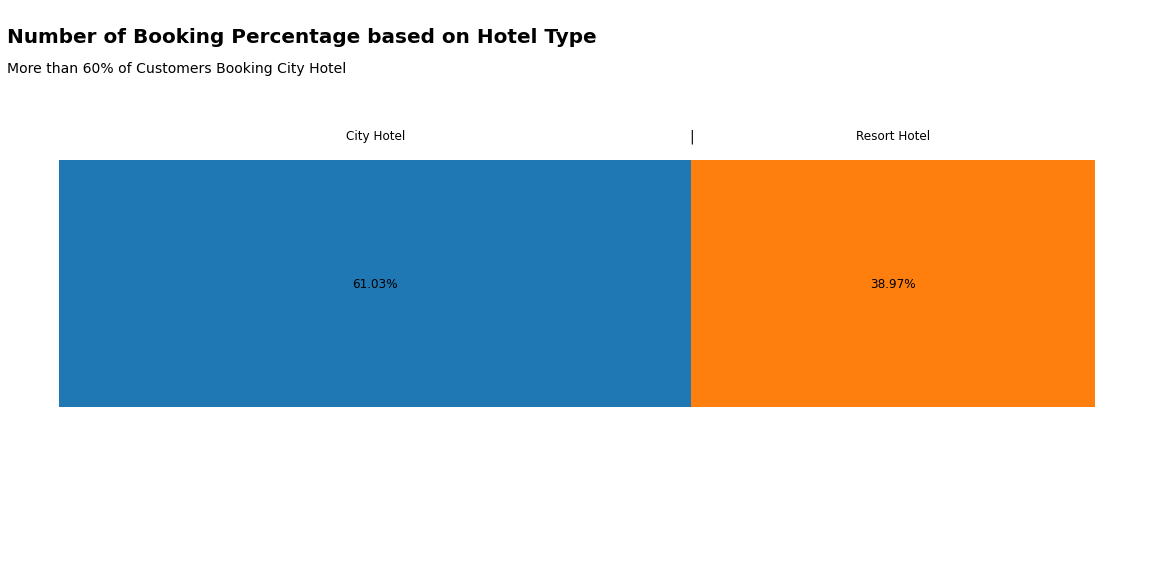

In [13]:
df2 = df.groupby(['hotel']).agg({'hotel':'count'})
df2 = df2.div(df2.sum(), axis=1).T

fig, ax = plt.subplots(figsize=(16,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

df2.plot(kind='barh', stacked=True, ax = ax, width = 0.4)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)

plt.text(y = 0, x = (df2['City Hotel'][0]/2),
             s = (str(round((df2['City Hotel'][0]*100),2))) + '%',
             size = 12, ha='center', va='center')

plt.text(y = 0, x = 1 - (df2['Resort Hotel'][0]/2),
             s = (str(round((df2['Resort Hotel'][0]*100),2))) + '%',
             size = 12, ha='center', va='center')

plt.text(y = 0.4, x = -0.05, s = 'Number of Booking Percentage based on Hotel Type',
         ha='left', va='center', weight = 'bold', size=20)
plt.text(y = 0.35, x = -0.05, s = 'More than 60% of Customers Booking City Hotel', ha='left', va='center', weight = 'medium', size = 14)
plt.text(y = 0.24, x = (df2['City Hotel'][0]/2), s = 'City Hotel', ha='center', va='center', weight = 'medium', size = 12)
plt.text(y = 0.24, x = (df2['City Hotel'][0]), s = '|', ha='center', va='center', size = 14)
plt.text(y = 0.24, x = 1 - (df2['Resort Hotel'][0]/2), s = 'Resort Hotel', ha='center', va='center', weight = 'medium', size = 12)

plt.legend().remove()
plt.tight_layout()

In [14]:
df1 = df.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique','is_canceled':'count'}).reset_index()
df1.columns = ['hotel', 'arrival_month', 'arrival_year', 'total_booking']
df1

,hotel,arrival_month,arrival_year,total_booking
0,City Hotel,April,2,3496
1,City Hotel,August,2,4897
2,City Hotel,December,2,3993
3,City Hotel,February,2,2929
4,City Hotel,January,2,2843
5,City Hotel,July,2,5306
6,City Hotel,June,2,4996
7,City Hotel,March,2,2656
8,City Hotel,May,2,4761
9,City Hotel,November,2,4029


In [15]:
df1['average_booking'] = round(df1['total_booking']/df1['arrival_year'],2) # normalization of each month
df1

,hotel,arrival_month,arrival_year,total_booking,average_booking
0,City Hotel,April,2,3496,1748.00
1,City Hotel,August,2,4897,2448.50
2,City Hotel,December,2,3993,1996.50
3,City Hotel,February,2,2929,1464.50
4,City Hotel,January,2,2843,1421.50
5,City Hotel,July,2,5306,2653.00
6,City Hotel,June,2,4996,2498.00
7,City Hotel,March,2,2656,1328.00
8,City Hotel,May,2,4761,2380.50
9,City Hotel,November,2,4029,2014.50


In [16]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
df1['arrival_month'] = pd.Categorical(df1['arrival_month'], categories=months, ordered=True)
df1 = df1.sort_values(['hotel', 'arrival_month'], ascending=[True, True])
df1

,hotel,arrival_month,arrival_year,total_booking,average_booking
4,City Hotel,January,2,2843,1421.50
3,City Hotel,February,2,2929,1464.50
7,City Hotel,March,2,2656,1328.00
0,City Hotel,April,2,3496,1748.00
8,City Hotel,May,2,4761,2380.50
6,City Hotel,June,2,4996,2498.00
5,City Hotel,July,2,5306,2653.00
1,City Hotel,August,2,4897,2448.50
11,City Hotel,September,3,5626,1875.33
10,City Hotel,October,3,6441,2147.00


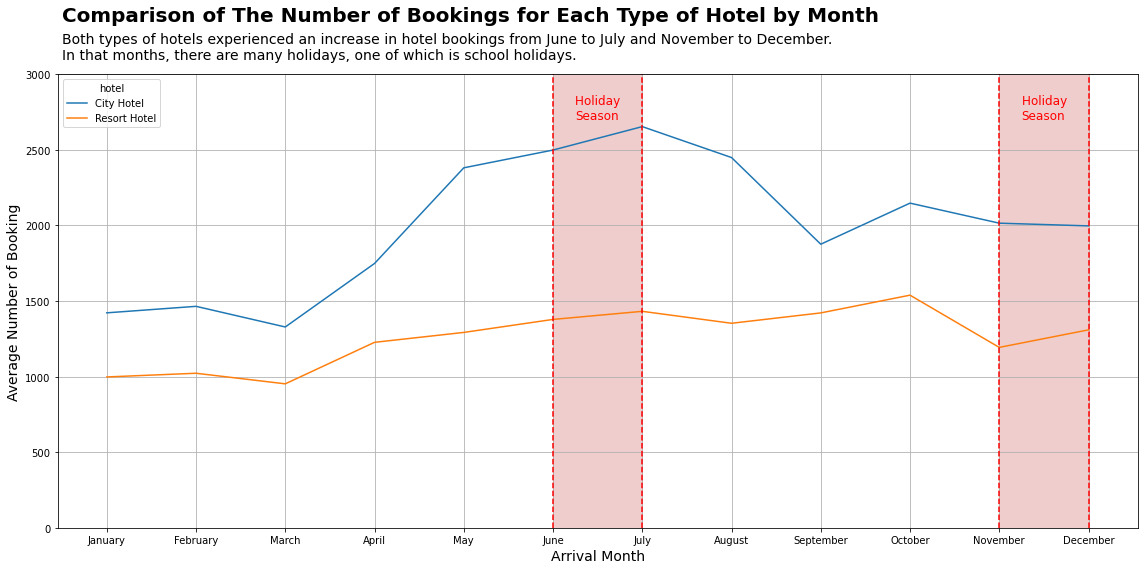

In [17]:
plt.figure(figsize=(16,8))
sns.lineplot(x='arrival_month', y='average_booking', hue='hotel', data=df1)
plt.grid()

plt.xlabel('Arrival Month', fontsize=14)
plt.ylabel('Average Number of Booking', fontsize=14)
plt.ylim(0, 3000)

plt.axvline(5, ls='--', color='red')
plt.axvline(6, ls='--', color='red')
plt.text(x=5.25, y=2700, s='Holiday \nSeason', fontsize=12, color='red')
plt.stackplot(np.arange(5,7,1), [[4800]], color='indianred', alpha=0.3)

plt.axvline(10, ls='--', color='red')
plt.axvline(11, ls='--', color='red')
plt.text(x=10.25, y=2700, s='Holiday \nSeason', fontsize=12, color='red')
plt.stackplot(np.arange(10,12,1), [[4800]], color='indianred', alpha=0.3)

plt.text(x=-0.5, y=3350, s='Comparison of The Number of Bookings for Each Type of Hotel by Month', 
         fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=3100, s='Both types of hotels experienced an increase in hotel bookings from June to July and November to December. \nIn that months, there are many holidays, one of which is school holidays.', 
         fontsize=14)

plt.tight_layout()

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [18]:
df['total_weeks'] = np.where(df['total_duration'] < 8,  '1 Week',
                   (np.where(df['total_duration'] < 15, '2 Weeks',
                   (np.where(df['total_duration'] < 22, '3 Weeks',
                   (np.where(df['total_duration'] < 29, '4 Weeks', '> 4 Weeks')))))))
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_duration,total_weeks
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0.0,0,Personal,75.00,0,0,Check-Out,1,1 Week
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304.0,0.0,0,Personal,75.00,0,0,Check-Out,1,1 Week
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240.0,0.0,0,Personal,98.00,0,1,Check-Out,2,1 Week
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0.0,0.0,0,Personal,107.00,0,0,Check-Out,2,1 Week
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,303.0,0.0,0,Personal,103.00,0,1,Check-Out,2,1 Week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,394.0,0.0,0,Personal,96.14,0,0,Check-Out,7,1 Week
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,9.0,0.0,0,Personal,225.43,0,2,Check-Out,7,1 Week
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,9.0,0.0,0,Personal,157.71,0,4,Check-Out,7,1 Week
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,89.0,0.0,0,Personal,104.40,0,0,Check-Out,7,1 Week


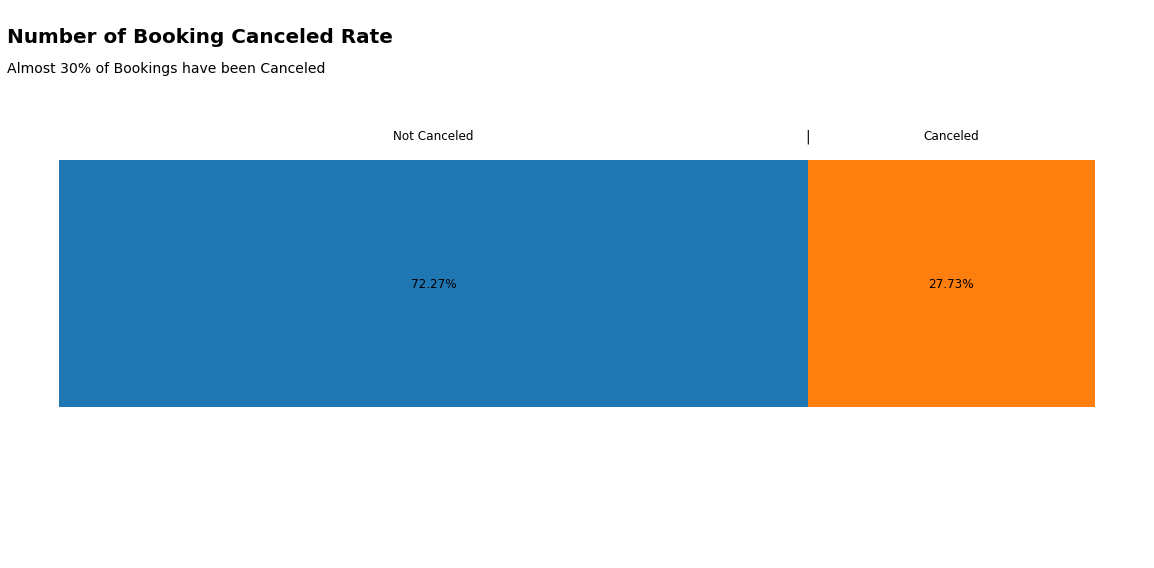

In [19]:
df2 = df.groupby(['is_canceled']).agg({'is_canceled':'count'})
df2 = df2.div(df2.sum(), axis=1).T

fig, ax = plt.subplots(figsize=(16,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

df2.plot(kind='barh', stacked=True, ax = ax, width = 0.4)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)

plt.text(y = 0, x = (df2[0][0]/2),
             s = (str(round((df2[0][0]*100),2))) + '%',
             size = 12, ha='center', va='center')

plt.text(y = 0, x = 1 - (df2[1][0]/2),
             s = (str(round((df2[1][0]*100),2))) + '%',
             size = 12, ha='center', va='center')

plt.text(y = 0.4, x = -0.05, s = 'Number of Booking Canceled Rate',
         ha='left', va='center', weight = 'bold', size=20)
plt.text(y = 0.35, x = -0.05, s = 'Almost 30% of Bookings have been Canceled', ha='left', va='center', weight = 'medium', size = 14)
plt.text(y = 0.24, x = (df2[0][0]/2), s = 'Not Canceled', ha='center', va='center', weight = 'medium', size = 12)
plt.text(y = 0.24, x = (df2[0][0]), s = '|', ha='center', va='center', size = 14)
plt.text(y = 0.24, x = 1 - (df2[1][0]/2), s = 'Canceled', ha='center', va='center', weight = 'medium', size = 12)

plt.legend().remove()
plt.tight_layout()

In [20]:
df3 = df.groupby(['hotel','is_canceled','total_weeks']).agg({'reservation_status':'count'}).reset_index()
df3

,hotel,is_canceled,total_weeks,reservation_status
0,City Hotel,0,1 Week,35711
1,City Hotel,0,2 Weeks,483
2,City Hotel,0,3 Weeks,27
3,City Hotel,0,4 Weeks,4
4,City Hotel,0,> 4 Weeks,2
5,City Hotel,1,1 Week,15114
6,City Hotel,1,2 Weeks,520
7,City Hotel,1,3 Weeks,73
8,City Hotel,1,4 Weeks,21
9,City Hotel,1,> 4 Weeks,18


In [21]:
df4 = pd.pivot_table(df3, values='reservation_status', index=['hotel', 'total_weeks'], columns='is_canceled').reset_index()
df4

is_canceled,hotel,total_weeks,0,1
0,City Hotel,1 Week,35711,15114
1,City Hotel,2 Weeks,483,520
2,City Hotel,3 Weeks,27,73
3,City Hotel,4 Weeks,4,21
4,City Hotel,> 4 Weeks,2,18
5,Resort Hotel,1 Week,22665,6858
6,Resort Hotel,2 Weeks,2510,939
7,Resort Hotel,3 Weeks,87,47
8,Resort Hotel,4 Weeks,36,20
9,Resort Hotel,> 4 Weeks,18,6


In [22]:
weeks = ['1 Week', '2 Weeks', '3 Weeks', '4 Weeks', '> 4 Weeks']
df4['total_weeks'] = pd.Categorical(df4['total_weeks'], categories=weeks, ordered=True)
df4 = df4.sort_values(['hotel', 'total_weeks'], ascending=[True, True])
df4

is_canceled,hotel,total_weeks,0,1
0,City Hotel,1 Week,35711,15114
1,City Hotel,2 Weeks,483,520
2,City Hotel,3 Weeks,27,73
3,City Hotel,4 Weeks,4,21
4,City Hotel,> 4 Weeks,2,18
5,Resort Hotel,1 Week,22665,6858
6,Resort Hotel,2 Weeks,2510,939
7,Resort Hotel,3 Weeks,87,47
8,Resort Hotel,4 Weeks,36,20
9,Resort Hotel,> 4 Weeks,18,6


In [23]:
df4['percentage_cancel'] = round((df4[1]/(df4[0]+df4[1]))*100, 2)
df4

is_canceled,hotel,total_weeks,0,1,percentage_cancel
0,City Hotel,1 Week,35711,15114,29.74
1,City Hotel,2 Weeks,483,520,51.84
2,City Hotel,3 Weeks,27,73,73.00
3,City Hotel,4 Weeks,4,21,84.00
4,City Hotel,> 4 Weeks,2,18,90.00
5,Resort Hotel,1 Week,22665,6858,23.23
6,Resort Hotel,2 Weeks,2510,939,27.23
7,Resort Hotel,3 Weeks,87,47,35.07
8,Resort Hotel,4 Weeks,36,20,35.71
9,Resort Hotel,> 4 Weeks,18,6,25.00


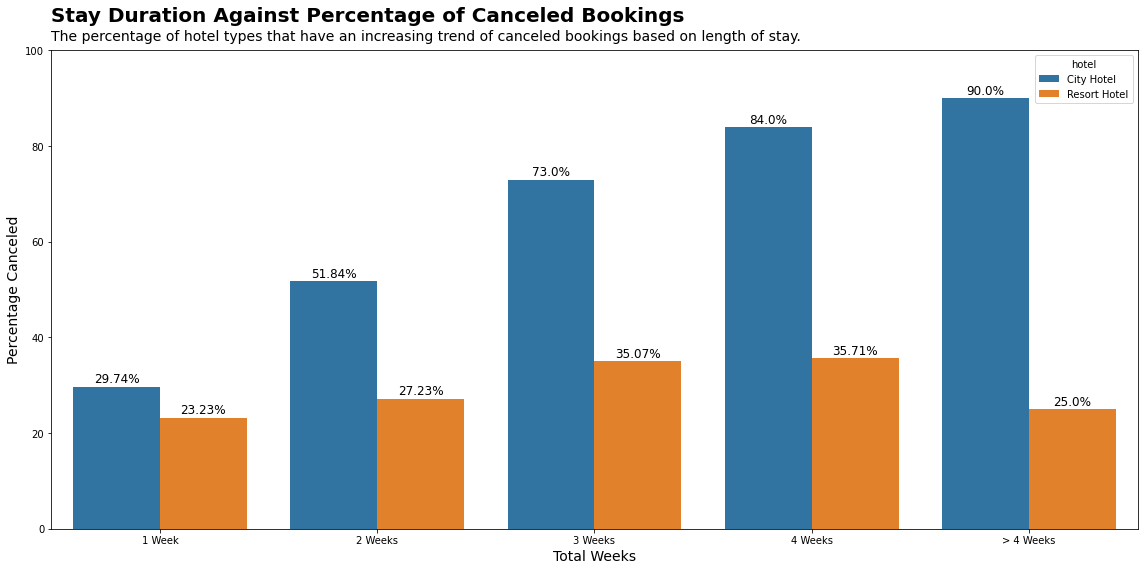

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='total_weeks', y='percentage_cancel', hue='hotel', data=df4)

plt.xlabel('Total Weeks', fontsize=14)
plt.ylabel('Percentage Canceled', fontsize=14) 
plt.ylim(0, 100)

plt.text(x=-0.5, y=106, s='Stay Duration Against Percentage of Canceled Bookings', 
         fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=102, s='The percentage of hotel types that have an increasing trend of canceled bookings based on length of stay.', 
         fontsize=14)

df5 = df4[df4['hotel'] == 'City Hotel'].reset_index(drop=True)
df6 = df4[df4['hotel'] == 'Resort Hotel'].reset_index(drop=True)

for i in range(5):
  plt.text(x = i - 0.2, y = (df5['percentage_cancel'][i] + 1.5),
            s = (str(df5['percentage_cancel'][i])) + '%', size=12, ha='center', va='center')
  plt.text(x = i + 0.2, y = (df6['percentage_cancel'][i] + 1.5),
            s = (str(df6['percentage_cancel'][i])) + '%', size=12, ha='center', va='center')

plt.tight_layout()

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [25]:
df['lead_time_category'] = np.where(df['lead_time'] < 8,  '1 Week',
                          (np.where(df['lead_time'] < 15, '2 Weeks',
                          (np.where(df['lead_time'] < 22, '3 Weeks',
                          (np.where(df['lead_time'] < 29, '4 Weeks',
                          (np.where(df['lead_time'] < 60, '2 Months', '> 2 Months')))))))))
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_duration,total_weeks,lead_time_category
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.00,0,0,Check-Out,1,1 Week,1 Week
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.00,0,0,Check-Out,1,1 Week,2 Weeks
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0.0,0,Personal,98.00,0,1,Check-Out,2,1 Week,2 Weeks
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0.0,0,Personal,107.00,0,0,Check-Out,2,1 Week,1 Week
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0.0,0,Personal,103.00,0,1,Check-Out,2,1 Week,2 Weeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0.0,0,Personal,96.14,0,0,Check-Out,7,1 Week,4 Weeks
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0.0,0,Personal,225.43,0,2,Check-Out,7,1 Week,> 2 Months
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0.0,0,Personal,157.71,0,4,Check-Out,7,1 Week,2 Months
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0.0,0,Personal,104.40,0,0,Check-Out,7,1 Week,> 2 Months


In [26]:
df7 = df.groupby(['hotel','is_canceled','lead_time_category']).agg({'reservation_status':'count'}).reset_index()
df7

,hotel,is_canceled,lead_time_category,reservation_status
0,City Hotel,0,1 Week,8534
1,City Hotel,0,2 Months,6135
2,City Hotel,0,2 Weeks,2971
3,City Hotel,0,3 Weeks,2279
4,City Hotel,0,4 Weeks,1720
5,City Hotel,0,> 2 Months,14588
6,City Hotel,1,1 Week,1015
7,City Hotel,1,2 Months,3032
8,City Hotel,1,2 Weeks,931
9,City Hotel,1,3 Weeks,928


In [27]:
df8 = pd.pivot_table(df7, values='reservation_status', index=['hotel', 'lead_time_category'], columns='is_canceled').reset_index()
df8

is_canceled,hotel,lead_time_category,0,1
0,City Hotel,1 Week,8534,1015
1,City Hotel,2 Months,6135,3032
2,City Hotel,2 Weeks,2971,931
3,City Hotel,3 Weeks,2279,928
4,City Hotel,4 Weeks,1720,795
5,City Hotel,> 2 Months,14588,9045
6,Resort Hotel,1 Week,7658,492
7,Resort Hotel,2 Months,3314,1345
8,Resort Hotel,2 Weeks,1851,321
9,Resort Hotel,3 Weeks,1264,402


In [28]:
category = ['1 Week', '2 Weeks', '3 Weeks', '4 Weeks', '2 Months', '> 2 Months']
df8['lead_time_category'] = pd.Categorical(df8['lead_time_category'], categories=category, ordered=True)
df8 = df8.sort_values(['hotel', 'lead_time_category'], ascending=[True, True])
df8

is_canceled,hotel,lead_time_category,0,1
0,City Hotel,1 Week,8534,1015
2,City Hotel,2 Weeks,2971,931
3,City Hotel,3 Weeks,2279,928
4,City Hotel,4 Weeks,1720,795
1,City Hotel,2 Months,6135,3032
5,City Hotel,> 2 Months,14588,9045
6,Resort Hotel,1 Week,7658,492
8,Resort Hotel,2 Weeks,1851,321
9,Resort Hotel,3 Weeks,1264,402
10,Resort Hotel,4 Weeks,1103,371


In [29]:
df8['percentage_cancel'] = round((df8[1]/(df8[0]+df8[1]))*100, 2)
df8

is_canceled,hotel,lead_time_category,0,1,percentage_cancel
0,City Hotel,1 Week,8534,1015,10.63
2,City Hotel,2 Weeks,2971,931,23.86
3,City Hotel,3 Weeks,2279,928,28.94
4,City Hotel,4 Weeks,1720,795,31.61
1,City Hotel,2 Months,6135,3032,33.08
5,City Hotel,> 2 Months,14588,9045,38.27
6,Resort Hotel,1 Week,7658,492,6.04
8,Resort Hotel,2 Weeks,1851,321,14.78
9,Resort Hotel,3 Weeks,1264,402,24.13
10,Resort Hotel,4 Weeks,1103,371,25.17


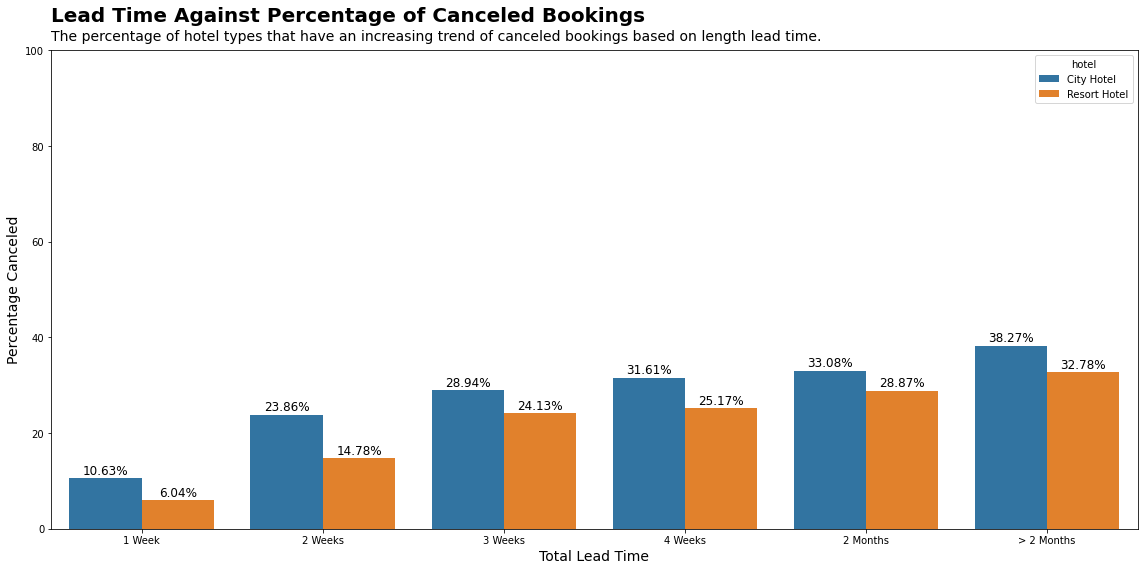

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='lead_time_category', y='percentage_cancel', hue='hotel', data=df8)

plt.xlabel('Total Lead Time', fontsize=14)
plt.ylabel('Percentage Canceled', fontsize=14) 
plt.ylim(0, 100)

plt.text(x=-0.5, y=106, s='Lead Time Against Percentage of Canceled Bookings', 
         fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=102, s='The percentage of hotel types that have an increasing trend of canceled bookings based on length lead time.', 
         fontsize=14)

df9 = df8[df8['hotel'] == 'City Hotel'].reset_index(drop=True)
df10 = df8[df8['hotel'] == 'Resort Hotel'].reset_index(drop=True)

for i in range(6):
  plt.text(x = i - 0.2, y = (df9['percentage_cancel'][i] + 1.5),
            s = (str(df9['percentage_cancel'][i])) + '%', size=12, ha='center', va='center')
  plt.text(x = i + 0.2, y = (df10['percentage_cancel'][i] + 1.5),
            s = (str(df10['percentage_cancel'][i])) + '%', size=12, ha='center', va='center')

plt.tight_layout()